<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Neural-Network/blob/main/01%20-%20neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from tensorflow import keras

%matplotlib inline

# 퍼셉트론

In [2]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris.data[:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int64) # Iris-Setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [5]:
print(-per_clf.coef_)
print(-per_clf.intercept_)

[[1.4 2.2]]
[-4.]


In [6]:
x0, x1 = np.meshgrid(
        np.linspace(1,5,5),
        np.linspace(11,15,5)
    )

print("x0\n", x0)
print("x1\n", x1)

x0
 [[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
x1
 [[11. 11. 11. 11. 11.]
 [12. 12. 12. 12. 12.]
 [13. 13. 13. 13. 13.]
 [14. 14. 14. 14. 14.]
 [15. 15. 15. 15. 15.]]


In [7]:
print("x0.ravel() :", x0.ravel())
print("x1.ravel() :", x1.ravel())

x0.ravel() : [1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4.
 5.]
x1.ravel() : [11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14.
 14. 14. 15. 15. 15. 15. 15.]


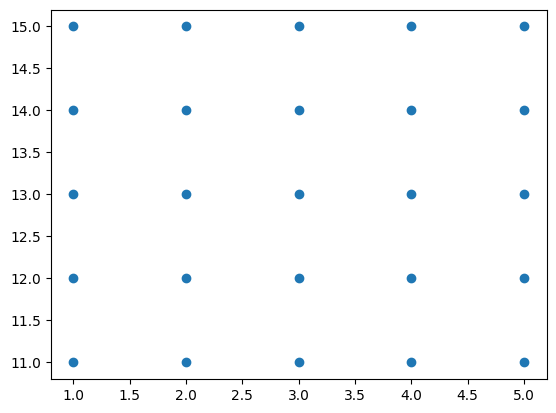

In [8]:
plt.scatter(x0, x1)
plt.show()

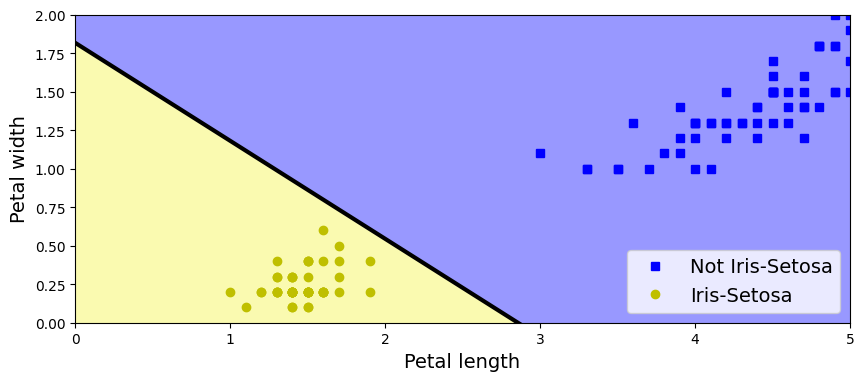

In [9]:
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# 활성화 함수

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

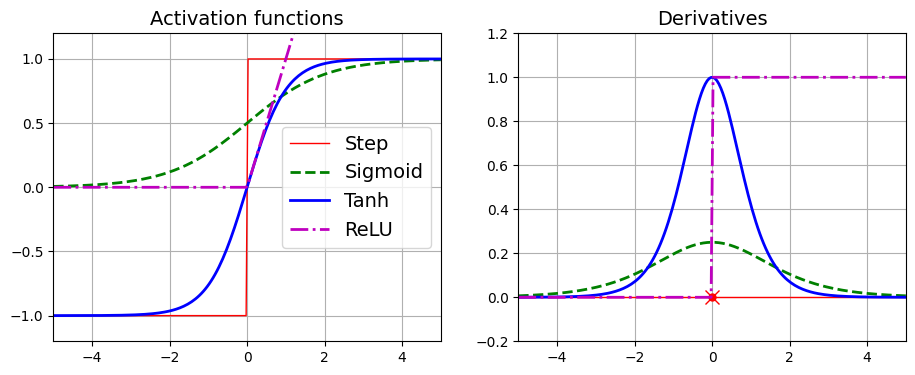

In [11]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [12]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

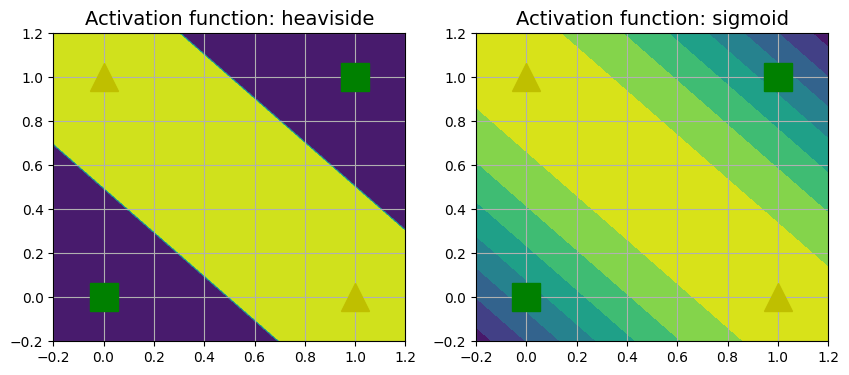

In [13]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# 케라스로 다층 퍼셉트론 구현하기
## 1.이미지 분류기 만들기

In [14]:
# 케라스를 사용하여, 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
print(type(fashion_mnist))

<class 'module'>


In [15]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
print(X_train_full.shape, X_train_full.dtype)
print(y_train_full.shape, y_train_full.dtype)

(60000, 28, 28) uint8
(60000,) uint8


In [17]:
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

(10000, 28, 28) uint8
(10000,) uint8


In [18]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [19]:
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

(55000, 28, 28) float64
(55000,) uint8


In [20]:
print(X_valid.shape, X_valid.dtype)
print(y_valid.shape, y_valid.dtype)

(5000, 28, 28) float64
(5000,) uint8


In [21]:
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

(10000, 28, 28) float64
(10000,) uint8


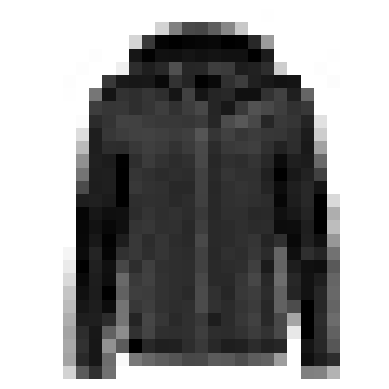

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Coat'

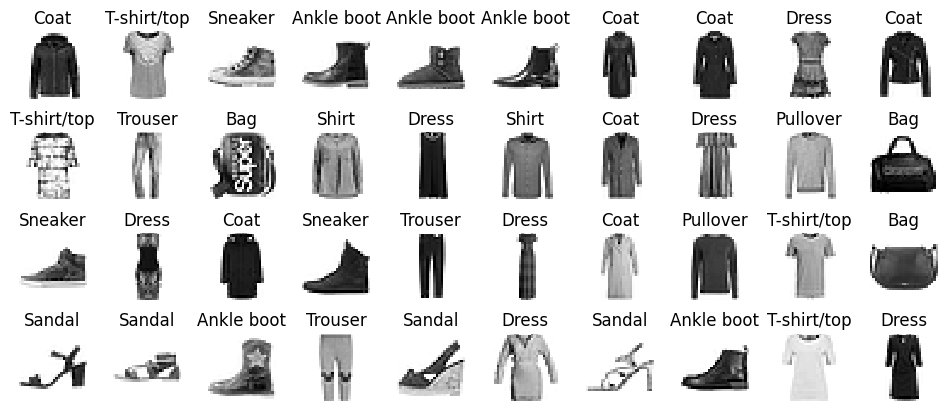

In [26]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [27]:
# 시퀀셜 API 를 사용하여 모델 만들기
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


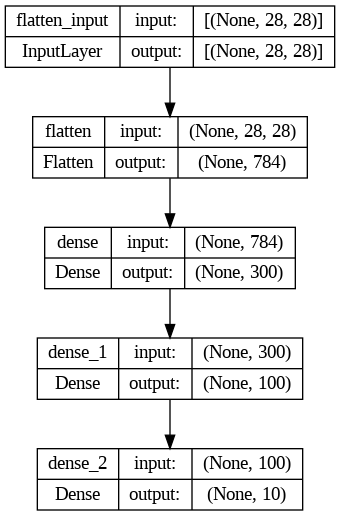

In [31]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [33]:
model.get_layer(hidden1.name) is hidden1

True

In [34]:
weights, biases = hidden1.get_weights()

In [35]:
weights

array([[-0.01215229, -0.06353066, -0.03727968, ..., -0.03939732,
        -0.06952097, -0.03436218],
       [-0.05203591, -0.01487454, -0.00273438, ..., -0.02967809,
        -0.04054455,  0.03917178],
       [ 0.03624051,  0.0274165 , -0.02504193, ...,  0.06109923,
         0.03090832,  0.06668626],
       ...,
       [-0.04746222,  0.04353476, -0.03737394, ...,  0.02479062,
        -0.03991567,  0.05696039],
       [-0.06830893, -0.04630958, -0.06770076, ..., -0.01912023,
        -0.01658542, -0.028101  ],
       [-0.02186818, -0.01692612,  0.06863163, ...,  0.05992219,
        -0.03065919, -0.06044959]], dtype=float32)

In [36]:
weights.shape

(784, 300)

In [37]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
biases.shape

(300,)

In [39]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [40]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 6ms/step - loss: 0.7374 - accuracy: 0.7524 - val_loss: 0.5255 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4928 - accuracy: 0.8278 - val_loss: 0.4384 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4464 - accuracy: 0.8423 - val_loss: 0.5418 - val_accuracy: 0.7964
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.8538 - val_loss: 0.3967 - val_accuracy: 0.8690
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4022 - accuracy: 0.8591 - val_loss: 0.3819 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8656 - val_loss: 0.3736 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3710 - accuracy: 0.8684 - val_loss: 0.3692 - val_accurac

In [41]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [42]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

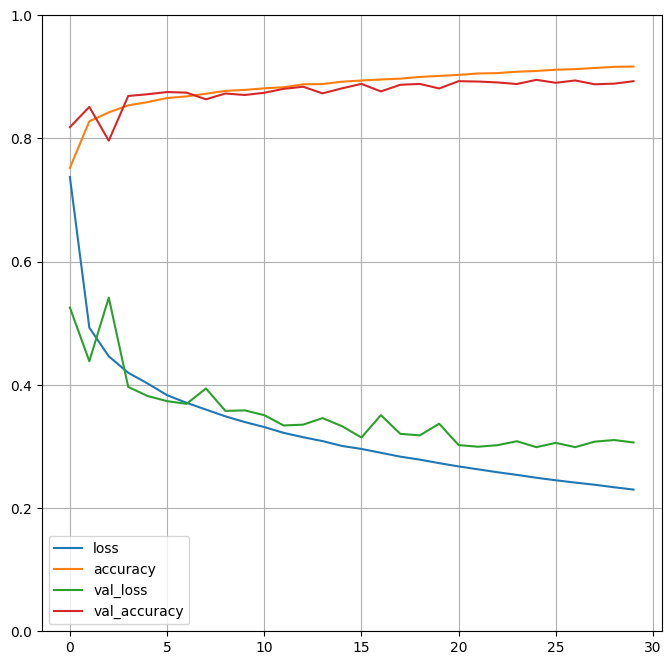

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
# 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8798


[0.3405592143535614, 0.879800021648407]

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 82ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
# 모델 예측
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 34ms/step


array([9, 2, 1])

In [48]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [49]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

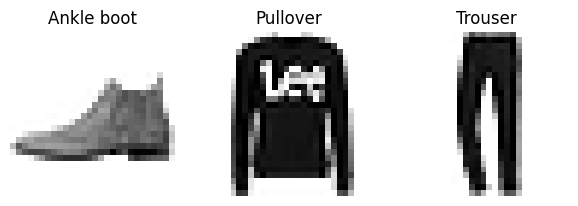

In [50]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##2.회귀 MLP

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [53]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 2.3179 - val_loss: 1.0521
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8344 - val_loss: 0.7847
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7243 - val_loss: 0.8783
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6786 - val_loss: 0.6823
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6428 - val_loss: 0.6389
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6106 - val_loss: 0.6742
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.7249
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5629 - val_loss: 0.5840
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5422 - val_loss: 0.5845
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5250 - val_loss: 0.6040

In [54]:
y_pred

array([[0.48857197],
       [1.6823919 ],
       [3.2092733 ]], dtype=float32)

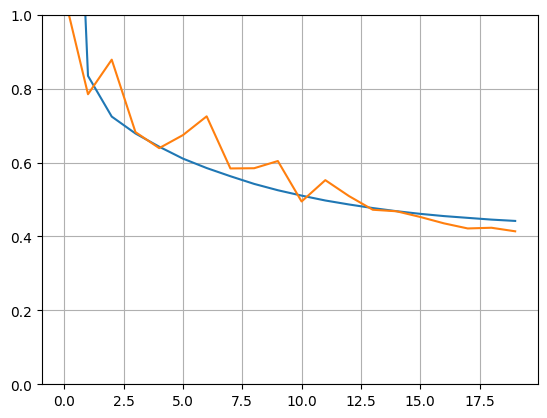

In [55]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 3.함수형 API

In [56]:
# 와이드 & 딥 신경망
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [58]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9553 - val_loss: 0.9144
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6391 - val_loss: 0.7930
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.5554
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5558 - val_loss: 0.5291
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5302 - val_loss: 0.5010
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5080 - val_loss: 0.4843
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4910 - val_loss: 0.4539
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4769 - val_loss: 0.4624
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4648 - val_loss: 0.4282
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4547 - val_loss: 0.4292

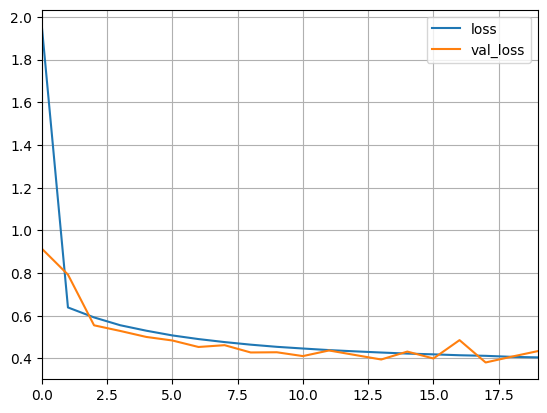

In [59]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.xlim([0, 19])
plt.show()

In [60]:
# 여러 개의 입력 다루기
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.9286 - val_loss: 2.8083
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7640 - val_loss: 0.8499
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6819 - val_loss: 0.6962
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6420 - val_loss: 0.6297
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6132 - val_loss: 0.5993
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5885 - val_loss: 0.5861
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5671 - val_loss: 0.5855
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5483 - val_loss: 0.5405
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5309 - val_loss: 0.5221
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5157 - val_loss: 0.5263

In [63]:
# 여러 개의 출력 다루기
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [64]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 30)                   930       ['dense_10[0][0]']            
                                                                                            

In [65]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.5691 - main_output_loss: 2.4335 - aux_output_loss: 3.7888 - val_loss: 1.7847 - val_main_output_loss: 1.6815 - val_aux_output_loss: 2.7133
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1173 - main_output_loss: 0.9744 - aux_output_loss: 2.4028 - val_loss: 0.9515 - val_main_output_loss: 0.8356 - val_aux_output_loss: 1.9953
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9055 - main_output_loss: 0.7940 - aux_output_loss: 1.9096 - val_loss: 0.8620 - val_main_output_loss: 0.7693 - val_aux_output_loss: 1.6956
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8099 - main_output_loss: 0.7151 - aux_output_loss: 1.6629 - val_loss: 0.7596 - val_main_output_loss: 0.6734 - val_aux_output_loss: 1.5348
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7472 - main_output_loss: 0.6620 - aux_output_loss: 1.5146 - val_loss

1/1 [==============================] - 0s 65ms/step


## 4.서브클래싱 API

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [67]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 2.5452 - output_1_loss: 2.4370 - output_2_loss: 3.5188 - val_loss: 1.5057 - val_output_1_loss: 1.3032 - val_output_2_loss: 3.3278
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.9546 - output_1_loss: 0.8225 - output_2_loss: 2.1441 - val_loss: 0.9439 - val_output_1_loss: 0.7102 - val_output_2_loss: 3.0471
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7790 - output_1_loss: 0.6759 - output_2_loss: 1.7067 - val_loss: 0.8478 - val_output_1_loss: 0.6188 - val_output_2_loss: 2.9085
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7158 - output_1_loss: 0.6247 - output_2_loss: 1.5352 - val_loss: 0.7949 - val_output_1_loss: 0.5811 - val_output_2_loss: 2.7197
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6799 - output_1_loss: 0.5946 - output_2_loss: 1.4473 - val_loss: 0.7512 - val_output_1_loss: 0.5531 - val_ou

1/1 [==============================] - 0s 72ms/step


## 5.모델 저장과 복원

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                270       
                                                                 
 dense_17 (Dense)            (None, 30)                930       
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.0474 - val_loss: 1.0682
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7104 - val_loss: 0.6315
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6130 - val_loss: 0.5596
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5760 - val_loss: 0.5343
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5493 - val_loss: 0.5086
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5255 - val_loss: 0.4878
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5051 - val_loss: 0.4697
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4870 - val_loss: 0.4530
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4713 - val_loss: 0.4390
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4397


In [71]:
model.save("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

1/1 [==============================] - 0s 51ms/step


array([[0.6678956],
       [1.3618405],
       [3.0440297]], dtype=float32)

## 6.콜백 사용하기

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [75]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1262 - val_loss: 2.4766
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.9052 - val_loss: 1.0330
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7355 - val_loss: 0.7003
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6721 - val_loss: 0.6397
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6284 - val_loss: 0.5876
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5919 - val_loss: 0.5568
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5624 - val_loss: 0.5343
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5375 - val_loss: 0.5085
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5167 - val_loss: 0.4881
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4832


In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 3s 5ms/step - loss: 0.4848 - val_loss: 0.4549
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4723 - val_loss: 0.4438
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4613 - val_loss: 0.4321
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4519 - val_loss: 0.4288
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4437 - val_loss: 0.4210
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4367 - val_loss: 0.4180
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4304 - val_loss: 0.4149
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4249 - val_loss: 0.4090
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4198 - val_loss: 0.4073
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4152 - val_lo

In [77]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

Epoch 1/5
347/363 [===========================>..] - ETA: 0s - loss: 0.3579
val/train: 1.05
363/363 [==============================] - 2s 4ms/step - loss: 0.3614 - val_loss: 0.3805
Epoch 2/5
351/363 [============================>.] - ETA: 0s - loss: 0.3610
val/train: 1.16
363/363 [==============================] - 1s 4ms/step - loss: 0.3605 - val_loss: 0.4174
Epoch 3/5
361/363 [============================>.] - ETA: 0s - loss: 0.3597
val/train: 1.07
363/363 [==============================] - 1s 4ms/step - loss: 0.3597 - val_loss: 0.3859
Epoch 4/5
352/363 [============================>.] - ETA: 0s - loss: 0.3590
val/train: 1.04
363/363 [==============================] - 1s 4ms/step - loss: 0.3588 - val_loss: 0.3718
Epoch 5/5
354/363 [============================>.] - ETA: 0s - loss: 0.3561
val/train: 1.02
363/363 [==============================] - 1s 4ms/step - loss: 0.3579 - val_loss: 0.3650


## 7.텐서보드

In [79]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [80]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_10_17-04_14_15'

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [83]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 2.2429 - val_loss: 1.1089
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7897 - val_loss: 0.6869
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6670 - val_loss: 0.6083
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6169 - val_loss: 0.5789
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5791 - val_loss: 0.5343
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5466 - val_loss: 0.5058
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5191 - val_loss: 0.4784
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4958 - val_loss: 0.4581
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4761 - val_loss: 0.4395
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4600 - val_loss: 0.4258

In [84]:
%load_ext tensorboard

In [85]:
import sys

if "google.colab" in sys.modules:
  from google.colab import output
  output.serve_kernel_port_as_window(6006)

!tensorboard dev upload \
  --logdir "/content/my_logs" \
  --name "my experiments" \
  --one_shot

<IPython.core.display.Javascript object>

2023-10-17 04:15:40.208936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

****************************************************************
****************************************************************
****************************************************************

NOTICE - ACTION REQUIRED: TensorBoard.dev is shutting down.

Please export your experiments by Dec 31, 2023.

See the FAQ at https://tensorboard.dev.

****************************************************************
****************************************************************
****************************************************************

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.p

# 신경망 하이퍼파라미터 튜닝하기

In [86]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [88]:
!python -m pip install scikeras

In [89]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(model=build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8])
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 3s 6ms/step - loss: 1.1004 - val_loss: 8.4607
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6915 - val_loss: 7.2256
Epoch 3/100
363/363 [==============================] - 2s 7ms/step - loss: 0.5519 - val_loss: 2.7123
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4840 - val_loss: 1.1091
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4460 - val_loss: 0.4371
Epoch 6/100
363/363 [==============================] - 4s 11ms/step - loss: 0.4290 - val_loss: 0.4984
Epoch 7/100
363/363 [==============================] - 2s 7ms/step - loss: 0.4192 - val_loss: 0.3829
Epoch 8/100
363/363 [==============================] - 2s 7ms/step - loss: 0.4112 - val_loss: 0.3879
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4051 - val_loss: 0.3789
Epoch 10/100
363/363 [==============================] - 3s 7ms/step - loss: 0.4000 - val_l

KerasRegressor(
	model=<function build_model at 0x7a1eb80d3eb0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=1
	n_neurons=30
	learning_rate=0.003
	input_shape=[8]
)

In [90]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
242/242 [==============================] - 1s 4ms/step - loss: 0.5475 - val_loss: 0.5213
Epoch 26/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5415 - val_loss: 0.5150
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5357 - val_loss: 0.5098
Epoch 28/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5301 - val_loss: 0.5037
Epoch 29/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5248 - val_loss: 0.4983
Epoch 30/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5197 - val_loss: 0.4935
Epoch 31/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5149 - val_loss: 0.4889
Epoch 32/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5103 - val_loss: 0.4842
Epoch 33/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5058 - val_loss: 0.4798
Epoch 34/100
242/242 [==============================] - 1s 

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(input_shape=[8], learning_rate=0.003, model=<function build_model at 0x7a1eb80d3eb0>, n_hidden=1, n_neurons=30),
                   param_distributions={'learning_rate': [0.0016834549246003507,
                                                          0.023908364455931787,
                                                          0.008731907739399207,
                                                          0.004725396149933918,
                                                          0.0006154014789262349,
                                                          0.0006153331256530192,
                                                          0.00039200217714159834,
                                                          0.0161...
                                                          0.0050214257366256385,
                                                          0.0005703073595961107,
                                                          0.001151888789941251,
                                                          0.0016212311563941985,
                                                          0.0024505367684280496,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.003203244812844405,
                                                          0.004591455636549436,
                                                          0.0003715541189658279, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [91]:
rnd_search_cv.best_params_

{'n_neurons': 94, 'n_hidden': 2, 'learning_rate': 0.005432590230265345}

In [92]:
rnd_search_cv.best_score_

0.7727850185183914

In [93]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function build_model at 0x7a1eb80d3eb0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=2
	n_neurons=94
	learning_rate=0.005432590230265345
	input_shape=[8]
)

In [94]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step


0.786335318099122

In [95]:
model = rnd_search_cv.best_estimator_.model
model

<function __main__.build_model(n_hidden=1, n_neurons=30, learning_rate=0.003, input_shape=[8])>